In [1]:
import pandas as pd

# Load the CSV you saved earlier
df = pd.read_csv('data/doge_usdt.csv', index_col='timestamp', parse_dates=True)

print(df.shape)
df.head()


(500, 5)


,open,high,low,close,volume
timestamp,,,,,
2023-07-14,0.07042,0.07311,0.06612,0.06849,1.501930e+09
2023-07-15,0.06848,0.07522,0.06769,0.07197,2.333413e+09
2023-07-16,0.07196,0.07221,0.06891,0.06952,9.306669e+08
2023-07-17,0.06951,0.07325,0.06752,0.06982,1.103083e+09
2023-07-18,0.06982,0.07032,0.06703,0.06866,5.889004e+08


In [2]:
# 1) Calculate daily returns
df['ret'] = df['close'].pct_change()

# 2) Calculate rolling volatility: 20‑day standard deviation of returns
df['vol'] = df['ret'].rolling(window=20).std()

# 3) Drop initial NaNs and display the first few rows
display(df[['ret', 'vol']].dropna().head())


,ret,vol
timestamp,,
2023-08-03,-0.008623,0.037212
2023-08-04,-0.001495,0.035568
2023-08-05,0.030489,0.035086
2023-08-06,-0.019020,0.035491
2023-08-07,-0.009829,0.035318


In [3]:
# Parameters for AMA
low_window = 10        # window length when volatility is low
high_window = 20       # window length when volatility is high
vol_threshold = 0.02   # 2% daily volatility threshold

# Assign window size per day based on volatility
df['window'] = df['vol'].apply(
    lambda v: low_window if v < vol_threshold else high_window
)

# Display the first few rows of volatility and chosen window
display(df[['vol', 'window']].dropna().head())


,vol,window
timestamp,,
2023-08-03,0.037212,20
2023-08-04,0.035568,20
2023-08-05,0.035086,20
2023-08-06,0.035491,20
2023-08-07,0.035318,20


In [4]:
# Prepare a list to store AMA values
ama_values = []

# Loop over each row index
for i in range(len(df)):
    w = int(df['window'].iloc[i])  # window length for this day
    if i < w:
        # If fewer than w data points exist, take the average of all available closes
        ama_values.append(df['close'].iloc[:i+1].mean())
    else:
        # Otherwise, average the last w closing prices
        start_idx = i - w + 1
        ama_values.append(df['close'].iloc[start_idx:i+1].mean())

# Assign the computed list as a new DataFrame column
df['AMA'] = ama_values

# Display the first 10 rows of close price and AMA
display(df[['close', 'AMA']].dropna().head(10))


,close,AMA
timestamp,,
2023-07-14,0.06849,0.068490
2023-07-15,0.07197,0.070230
2023-07-16,0.06952,0.069993
2023-07-17,0.06982,0.069950
2023-07-18,0.06866,0.069692
2023-07-19,0.07003,0.069748
2023-07-20,0.07062,0.069873
2023-07-21,0.07322,0.070291
2023-07-22,0.07047,0.070311


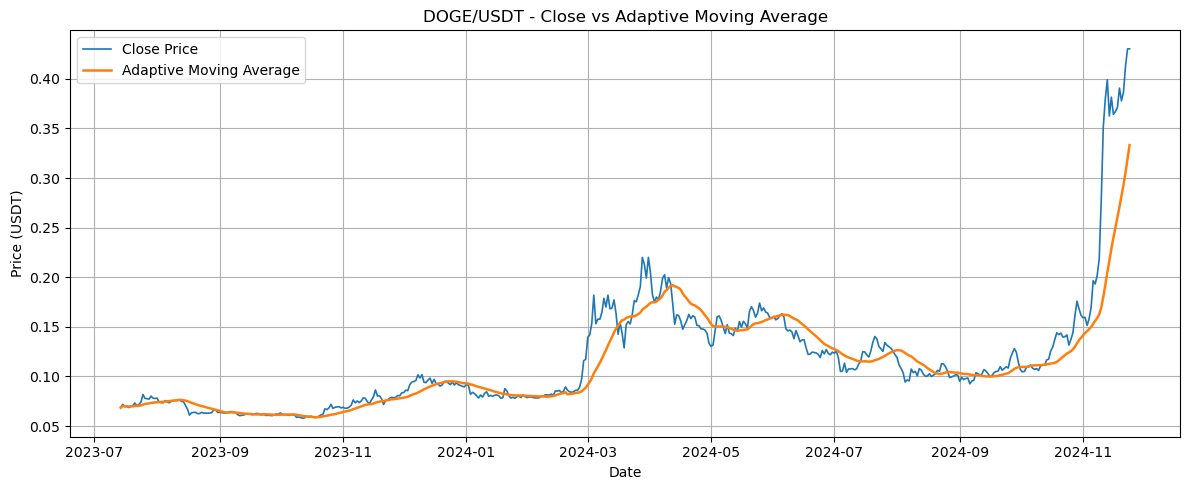

In [5]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['close'], label='Close Price', linewidth=1.2)
plt.plot(df.index, df['AMA'], label='Adaptive Moving Average', linewidth=1.8)
plt.title('DOGE/USDT - Close vs Adaptive Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
# Save the full DataFrame (with AMA, volatility, etc.) to a new file
df.to_csv('data/doge_usdt_with_ama.csv')
print("Saved enhanced data to data/doge_usdt_with_ama.csv")


Saved enhanced data to data/doge_usdt_with_ama.csv
